In [6]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

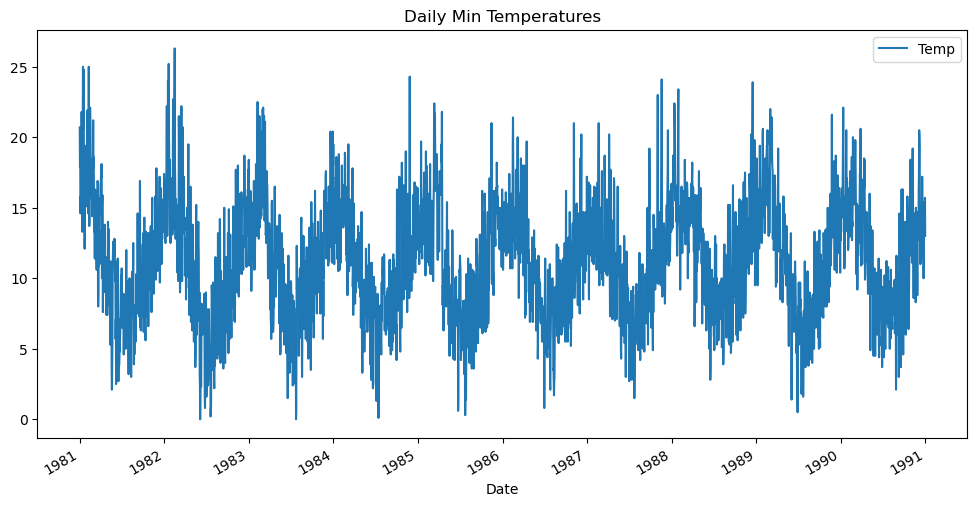

In [8]:
# Step 2: Load Data
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv'
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')
df = df[['Temp']]
df.plot(figsize=(12, 6), title='Daily Min Temperatures')
plt.show()

In [10]:
# Step 3: Normalize
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

In [12]:
# Step 4: Create Sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 30
X, y = create_sequences(scaled, window_size)

In [14]:
# Step 5: Train/Test Split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [16]:
# Step 6: Build LSTM Model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Step 7: Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0597 - val_loss: 0.0107
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0114 - val_loss: 0.0111
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109 - val_loss: 0.0104
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0106 - val_loss: 0.0099
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0106 - val_loss: 0.0096
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 - val_loss: 0.0098
Epoch 9/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 - val_loss: 0.0098
Epoch 10/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0096 - val_loss: 0.0092
Epoch 11/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0088 - val_loss: 0.0093
Epoch 12/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [20]:
# Step 8: Evaluate
loss = model.evaluate(X_test, y_test)
print(f"Test MSE: {loss}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0065 
Test MSE: 0.007217894773930311


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


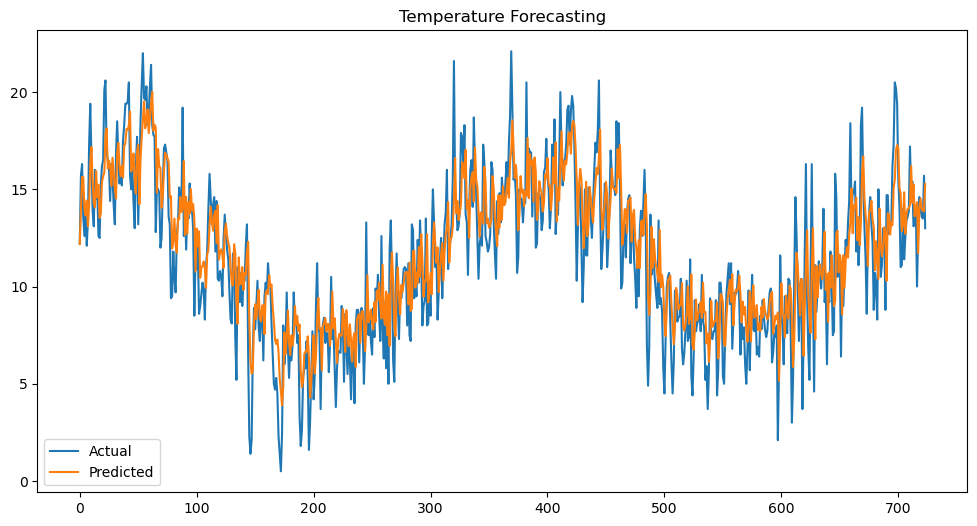

In [24]:
# Step 9: Predict and Plot
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('Temperature Forecasting')
plt.legend()
plt.show()